In [1]:
#imports, nothing to see here
import numpy as np
np.set_printoptions(threshold=np.nan)
from scipy import stats
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 10
arms = np.random.rand(n)
eps = 0.25
trials = 100
totalMeanReward=[]

In [3]:
print arms

[ 0.0305727   0.07765056  0.42116286  0.70620203  0.7358476   0.69255745
  0.52829269  0.75456458  0.34123982  0.18513813]


In [4]:
def reward(prob):
    reward = 0;
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

In [5]:
np.argmax(arms)

7

In [6]:
#initialize memory array; has 1 row defaulted to random action index
av = np.array([np.random.randint(0,(n+1)), 0, 0]).reshape(1,3) #av = action-value
avMock=av
print "av:", av

#greedy method to select best arm based on memory array (historical results)
def bestArm(a):
    bestArm = 0 #just default to 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:,0] == u[0])][:, 1]) #calc mean reward for each action
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
            
    return bestArm

choice = bestArm(av)
print choice

av: [[1 0 0]]
0


эпсилон (вероятность смены бандита): 0.25
количество рук 10
лучший бандит 7
randarm% 18 %
дергаем лучшего бандита 0
финальная средняя прибыль за игру 6.50495049505


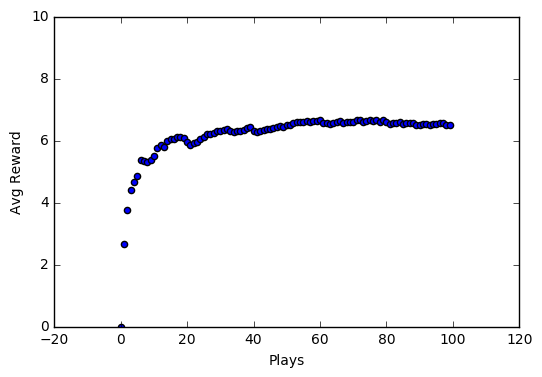

In [7]:
#print "av initial", av
greedy=0
randarm=0

plt.xlabel("Plays")
plt.ylabel("Avg Reward")
plt.ylim([0,10]) 
#plt.ylabel("% pulling best arm")
for i in range(trials):
    #a=random.random()
    if random.random() > eps: #greedy arm selection
        #print "greedy"
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice]), 0]])
        av = np.concatenate((av, thisAV), axis=0) 
        greedy+=1
    else: #random arm selection
        #print "random arm"
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice]), 1]]) #choice, reward 
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        randarm+=1
    #print 'iteration', i+1
    #print 'choice aka bestArm:', choice
    #print 'thisAV:', thisAV
    #print 'av shape:', av.shape
    #print 'av:', av
    #print ""
    #calculate the percentage the correct arm is chosen (you can plot this instead of reward)
    #percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)
    #plt.scatter(i, percCorrect)

#print 'список "дерганий":\n', av
#print 'greedy', greedy, 'randarm', randarm
percentRand = 100*randarm/trials

print 'эпсилон (вероятность смены бандита):', eps
print 'количество рук', len(arms)
print 'лучший бандит', np.argmax(arms)
print 'randarm%', percentRand,"%"
percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
print "дергаем лучшего бандита", percCorrect
print "финальная средняя прибыль за игру", np.mean(av[:,1])
totalMeanReward.append(np.mean(av[:,1]))

In [8]:
# ЕСЛИ ХОЧЕТСЯ ПРОВЕРИТЬ, ЧТО ПРОИСХОДИТ НА КАЖДОЙ ПОПЫТКЕ:
#print "размер массива попыток", av.shape
#print "попытки (0-рука, 1-выигрыш, 2-остались/поменяли)", av

эпсилон (вероятность смены бандита): 0.25
количество рук 10
лучший бандит 7
randarm% 22 %
дергаем лучшего бандита 73
финальная средняя прибыль за игру 6.52475247525


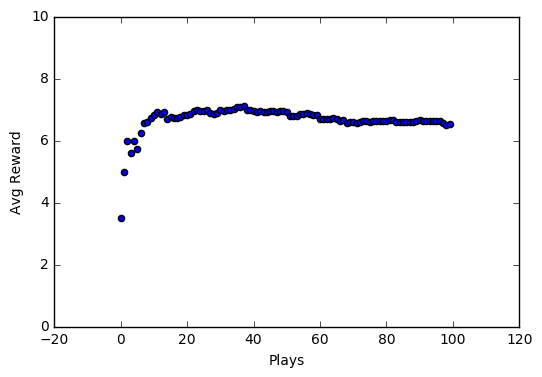

In [9]:
av=avMock
#print "av initial", av
greedy=0
randarm=0

plt.xlabel("Plays")
plt.ylabel("Avg Reward")
plt.ylim([0,10]) 
#plt.ylabel("% pulling best arm")
for i in range(trials):
    #a=random.random()
    if random.random() > eps: #greedy arm selection
        #print "greedy"
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice]), 0]])
        av = np.concatenate((av, thisAV), axis=0) 
        greedy+=1
    else: #random arm selection
        #print "random arm"
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice]), 1]]) #choice, reward 
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        randarm+=1
    #print 'iteration', i+1
    #print 'choice aka bestArm:', choice
    #print 'thisAV:', thisAV
    #print 'av shape:', av.shape
    #print 'av:', av
    #print ""
    #calculate the percentage the correct arm is chosen (you can plot this instead of reward)
    percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)
    #plt.scatter(i, percCorrect)
#print 'лучший бандит', np.argmax(arms)
#print 'список "дерганий":\n', av

#print 'greedy', greedy, 'randarm', randarm
percentRand = 100*randarm/trials
print 'эпсилон (вероятность смены бандита):', eps
print 'количество рук', len(arms)
print 'лучший бандит', np.argmax(arms)
print 'randarm%', percentRand,"%"
percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
print "дергаем лучшего бандита", percCorrect
print "финальная средняя прибыль за игру", np.mean(av[:,1])
totalMeanReward.append(np.mean(av[:,1]))

[[1 0 0]]
эпсилон (вероятность смены бандита): 0.25
количество рук 10
лучший бандит 7
randarm% 23 %
дергаем лучшего бандита 61
финальная средняя прибыль за игру 6.0099009901


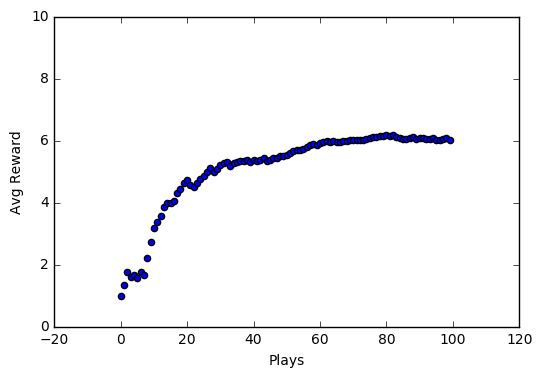

In [10]:
av=avMock
print av
#print "av initial", av
greedy=0
randarm=0

plt.xlabel("Plays")
plt.ylabel("Avg Reward")
plt.ylim([0,10]) 
#plt.ylabel("% pulling best arm")
for i in range(trials):
    #a=random.random()
    if random.random() > eps: #greedy arm selection
        #print "greedy"
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice]), 0]])
        av = np.concatenate((av, thisAV), axis=0) 
        greedy+=1
    else: #random arm selection
        #print "random arm"
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice]), 1]]) #choice, reward 
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        randarm+=1
    #print 'iteration', i+1
    #print 'choice aka bestArm:', choice
    #print 'thisAV:', thisAV
    #print 'av shape:', av.shape
    #print 'av:', av
    #print ""
    #calculate the percentage the correct arm is chosen (you can plot this instead of reward)
    percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)
    #plt.scatter(i, percCorrect)
#print 'лучший бандит', np.argmax(arms)
#print 'список "дерганий":\n', av

#print 'greedy', greedy, 'randarm', randarm
percentRand = 100*randarm/trials
print 'эпсилон (вероятность смены бандита):', eps
print 'количество рук', len(arms)
print 'лучший бандит', np.argmax(arms)
print 'randarm%', percentRand,"%"
percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
print "дергаем лучшего бандита", percCorrect
print "финальная средняя прибыль за игру", np.mean(av[:,1])
totalMeanReward.append(np.mean(av[:,1]))

эпсилон (вероятность смены бандита): 0.25
количество рук 10
лучший бандит 7
randarm% 22 %
дергаем лучшего бандита 0
финальная средняя прибыль за игру 6.18811881188


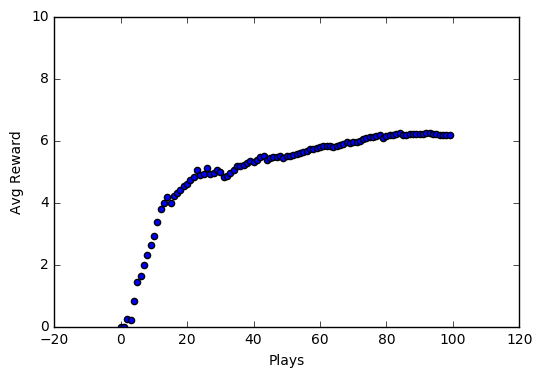

In [11]:
av=avMock
#print "av initial", av
greedy=0
randarm=0

plt.xlabel("Plays")
plt.ylabel("Avg Reward")
plt.ylim([0,10]) 
#plt.ylabel("% pulling best arm")
for i in range(trials):
    #a=random.random()
    if random.random() > eps: #greedy arm selection
        #print "greedy"
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice]), 0]])
        av = np.concatenate((av, thisAV), axis=0) 
        greedy+=1
    else: #random arm selection
        #print "random arm"
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice]), 1]]) #choice, reward 
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        randarm+=1
    #print 'iteration', i+1
    #print 'choice aka bestArm:', choice
    #print 'thisAV:', thisAV
    #print 'av shape:', av.shape
    #print 'av:', av
    #print ""
    #calculate the percentage the correct arm is chosen (you can plot this instead of reward)
    percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)
    #plt.scatter(i, percCorrect)
#print 'лучший бандит', np.argmax(arms)
#print 'список "дерганий":\n', av

#print 'greedy', greedy, 'randarm', randarm
percentRand = 100*randarm/trials
print 'эпсилон (вероятность смены бандита):', eps
print 'количество рук', len(arms)
print 'лучший бандит', np.argmax(arms)
print 'randarm%', percentRand,"%"
percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
print "дергаем лучшего бандита", percCorrect
print "финальная средняя прибыль за игру", np.mean(av[:,1])
totalMeanReward.append(np.mean(av[:,1]))

эпсилон (вероятность смены бандита): 0.25
количество рук 10
лучший бандит 7
randarm% 34 %
дергаем лучшего бандита 0
финальная средняя прибыль за игру 5.48514851485


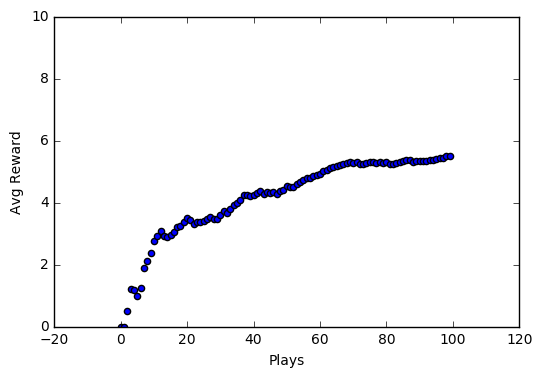

In [12]:
av=avMock
#print "av initial", av
greedy=0
randarm=0

plt.xlabel("Plays")
plt.ylabel("Avg Reward")
plt.ylim([0,10]) 
#plt.ylabel("% pulling best arm")
for i in range(trials):
    #a=random.random()
    if random.random() > eps: #greedy arm selection
        #print "greedy"
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice]), 0]])
        av = np.concatenate((av, thisAV), axis=0) 
        greedy+=1
    else: #random arm selection
        #print "random arm"
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice]), 1]]) #choice, reward 
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        randarm+=1
    #print 'iteration', i+1
    #print 'choice aka bestArm:', choice
    #print 'thisAV:', thisAV
    #print 'av shape:', av.shape
    #print 'av:', av
    #print ""
    #calculate the percentage the correct arm is chosen (you can plot this instead of reward)
    percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)
    #plt.scatter(i, percCorrect)
#print 'лучший бандит', np.argmax(arms)
#print 'список "дерганий":\n', av

#print 'greedy', greedy, 'randarm', randarm
percentRand = 100*randarm/trials
print 'эпсилон (вероятность смены бандита):', eps
print 'количество рук', len(arms)
print 'лучший бандит', np.argmax(arms)
print 'randarm%', percentRand,"%"
percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
print "дергаем лучшего бандита", percCorrect
print "финальная средняя прибыль за игру", np.mean(av[:,1])
totalMeanReward.append(np.mean(av[:,1]))

In [13]:
print "eps (веротность смены бандита):", eps
print "попыток:", trials
print 'кол-во бандитов:', n
print 'средний выигрыш за всю игру:', np.mean(totalMeanReward)

eps (веротность смены бандита): 0.25
попыток: 100
кол-во бандитов: 10
средний выигрыш за всю игру: 6.14257425743
